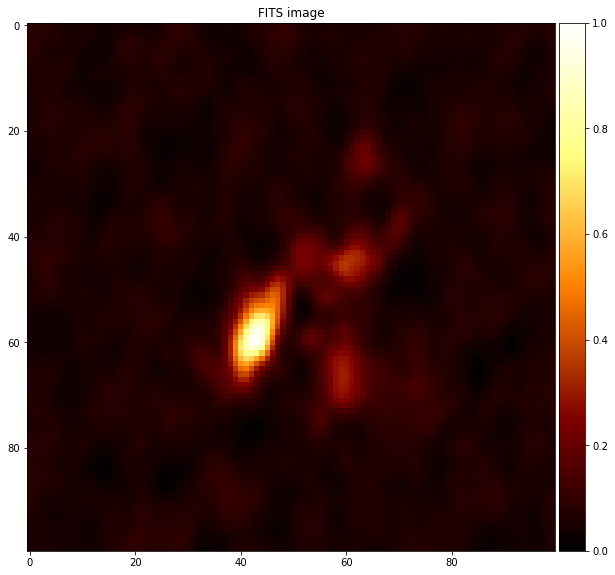

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

def image_plot(data, title='FITS image'):
    plt.figure(figsize=(10,10))
    im = plt.imshow(data, cmap=plt.cm.afmhot, interpolation=None)
    plt.title(title)
    #plt.axis('off')
    divider = make_axes_locatable(plt.gca())
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)
    plt.show()
    
data = np.load("orion.npy")

image_plot(data)

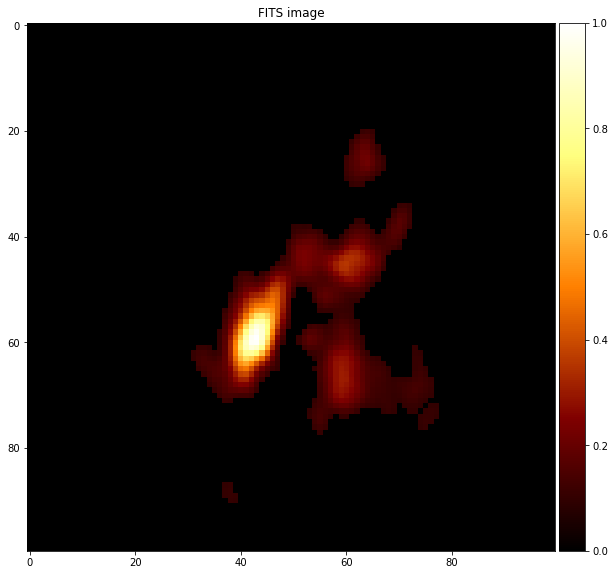

In [2]:
RMS = np.sqrt(np.sum(data**2)/(data.shape[0]*data.shape[1]))
mask = data >= RMS
image_plot(data*mask)

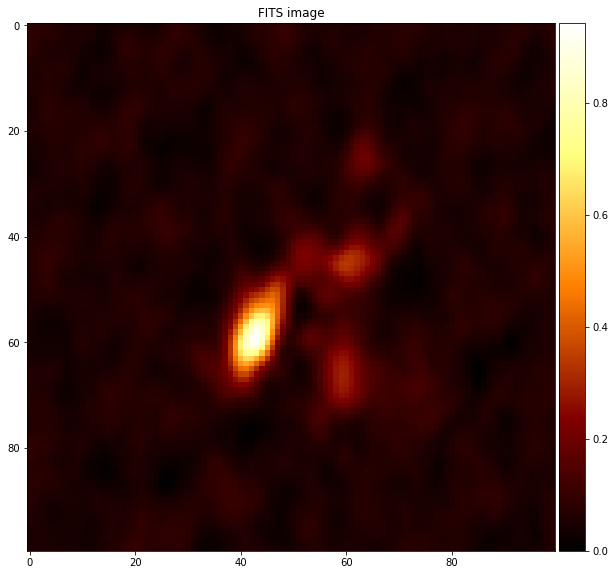

In [3]:
# Gaussian blur filter
kernel_filter = 1./16. * np.array([[1,2,1], [2,4,2], [1,2,1]])

def apply_filter(data, mask, kernel_filter):
    for i in np.arange(1, data.shape[0]-1):
        for j in np.arange(1, data.shape[1]-1):
            if(mask[i,j]):
                data[i,j] = np.sum(data[i-1:i+2,j-1:j+2]*kernel_filter)
    return None

apply_filter(data, mask, kernel_filter)
image_plot(data)